In [1]:
import editdistance
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

In [104]:
with open("../data/SlO_10/SlO1_R1_spacers_10.txt") as f:
    lines_1 = [x[:31] for x in f.readlines()[1:]]
with open("../data/SlO_10/SlO1_R2_spacers_10.txt") as f:
    lines_2 = [x[:31] for x in f.readlines()[1:]]


In [105]:
lines = lines_1 + lines_2

In [106]:
with open("../data/SlO_10/SlO1_R1_pairs_10.txt") as f:
    pairs_1 = [x[:-2] for x in f.readlines()[1:]]
with open("../data/SlO_10/SlO1_R2_pairs_10.txt") as f:
    pairs_2 = [x[:-2] for x in f.readlines()[1:]]

In [107]:
pairs = pairs_1 + pairs_2

In [108]:
from collections import Counter

In [109]:
counter = Counter(lines)

In [110]:
def get_keys_vals_sorted(counter):
    items = counter.items()
    keys = []
    vals = []
    for k,v in items:
        #print(k, v)
        keys.append(k)
        vals.append(v)
        
    arg_sort = np.argsort(vals)[::-1]
    keys = np.array(keys)[arg_sort]
    vals = np.array(vals)[arg_sort]
    
    return keys, vals

In [111]:
keys, vals = get_keys_vals_sorted(counter)

In [112]:
len(lines)

325413

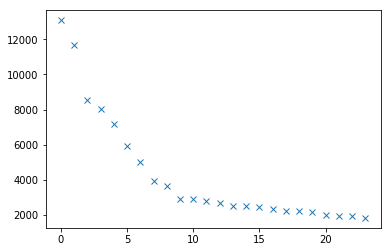

In [114]:
plt.plot((vals[:24]),linestyle='None',marker = "x")
plt.show()

In [41]:
arg_sort = np.argsort(vals)[::-1]

In [17]:
vals[:400]

array([13088, 11662,  8546,  8013,  7166,  5904,  4998,  3946,  3658,
        2913,  2904,  2821,  2675,  2537,  2509,  2427,  2321,  2250,
        2223,  2168,  2012,  1959,  1953,  1832,  1628,  1578,  1559,
        1493,  1397,  1372,  1361,  1334,  1309,  1299,  1237,  1233,
        1233,  1230,  1157,  1136,  1100,  1089,  1075,  1068,  1007,
         973,   973,   945,   921,   830,   814,   812,   808,   799,
         787,   781,   768,   752,   739,   731,   720,   718,   716,
         708,   700,   699,   687,   667,   657,   634,   631,   629,
         615,   611,   607,   594,   593,   582,   569,   556,   555,
         547,   531,   527,   518,   514,   507,   498,   495,   491,
         484,   483,   479,   477,   471,   464,   461,   453,   449,
         448,   448,   447,   435,   434,   427,   423,   420,   403,
         401,   396,   387,   385,   384,   378,   378,   376,   375,
         363,   359,   358,   357,   356,   352,   345,   345,   343,
         341,   339,

### Select 1

In [78]:
clusters = keys[:23]

In [79]:
clusters

array(['GGGCGCACGGAATACAAAGCCGTGTATCTGC',
       'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG',
       'TGGCTCTGCAACAGCAGCACCCATGACCACG',
       'CTGTTTTCGCAAATCTATGGACTATTGCTAT',
       'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
       'GAAATGCTGGTGAGCGTTAATGCCGCAAACA',
       'CAATCTGGGCGACCGGTCATCATCGCTTCGA',
       'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG',
       'GTAGTCCATCATTCCACCTATGTCTGAACTC',
       'GCAGGCGGCGACGCGCAGGGTATGCGCGATT',
       'TCAACATTATCAATTACAACCGACAGGGAGC',
       'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT',
       'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT',
       'CCGGGGGATAATGTTTACGGTCATGCGCCCC',
       'GCGACCGCTCAGAAATTCCAGACCCGATCCA',
       'GCGGGCGTTAACGCGGTGATACTGTTTGACG',
       'TAGTTTCCGTATCTCCGGATTTATAAAGCTG',
       'CAGAACATACTTCAAAGCCCGAGGCGTACAC',
       'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA',
       'TAGGCCTATAGAGACGAGCGTTCGTTAAAGC',
       'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
       'GCCTGACATTGCAGACGTTACAAATTGAGAG', 'AGTGCTGGACCATTTCAAATTCACAATAGAT'],
      dtype='<U31')

In [80]:
lines = np.array(lines)

In [81]:
lines.shape[0]

325413

In [82]:
for i in tqdm(range(lines.shape[0])):
    for c in clusters:
        if editdistance.eval(c, lines[i]) < 5:
            lines[i] = c
        

100%|██████████| 325413/325413 [00:29<00:00, 10877.19it/s]


In [83]:
counter2 = Counter(lines)

In [84]:
counter2

Counter({'GCCTGACATTGCAGACGTTACAAATTGAGAG': 2623,
         'TGTGTCGGAGTATGCGGGCTGATTTTCGTCT': 3,
         'CTGTTTTCGCAAATCTATGGACTATTGCTAT': 11360,
         'GGGCGCACGGAATACAAAGCCGTGTATCTGC': 18792,
         'TAGGCCTTTAGAGAGGCGCGTTTGTTAAACA': 1,
         'CTGCCGACTGACCGCCGACGCTTTCGCGTTA': 345,
         'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG': 5513,
         'ATGATGAAGAAGGCCAAGTATCTGCGCCCGA': 15,
         'AACAACGTTATCGATTACAACTGACAGGGAG': 2,
         'CCACCTGCCGCGACGGGTGCCAGCAGATCAC': 140,
         'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG': 16574,
         'CCGCCGTTGGCACCGTCAAACTCCGGTACTG': 657,
         'GCGACCGCTCAGAAATTCCAGACCCGATCCA': 3555,
         'CAATCTGGGCGACCGGTCATCATCGCTTCGA': 8227,
         'GAAATGCTGGTGAGCGTTAATGCCGCAAACA': 7981,
         'CACACCGTCGCCGGTGCGCGATAACACGTAA': 1493,
         'ATTAAATTTTGCAGGTAGCTGTTATCCGTGT': 319,
         'TGCATGTCAGATGGGCACTGCTGATTGGAGA': 1,
         'CCAGGTTTGGAACTCGGGCCAGATGACCATG': 167,
         'TCCGTCCACCCTGATAGCCGCCCTTGTGATC': 1075,
         'ATAGAC

In [85]:
keys_2, vals_2 = get_vals_keys_sorted(counter2)

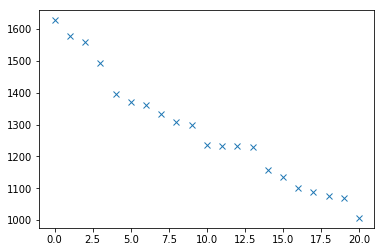

In [89]:
plt.plot(vals_2[24:45],linestyle='None',marker = "x")
plt.show()

### Select 2

In [90]:
mask = vals_2 > 1050

In [91]:
mask.sum()

44

In [92]:
clusters_2 = keys_2[mask]

In [93]:
for i in tqdm(range(lines.shape[0])):
    for c in clusters_2:
        if editdistance.eval(c, lines[i]) < 5:
            lines[i] = c
        

100%|██████████| 325413/325413 [00:56<00:00, 5716.56it/s]


In [94]:
counter3 = Counter(lines)

In [95]:
counter3

Counter({'GCCTGACATTGCAGACGTTACAAATTGAGAG': 2623,
         'TGTGTCGGAGTATGCGGGCTGATTTTCGTCT': 3,
         'CTGTTTTCGCAAATCTATGGACTATTGCTAT': 11360,
         'GGGCGCACGGAATACAAAGCCGTGTATCTGC': 18792,
         'TAGGCCTTTAGAGAGGCGCGTTTGTTAAACA': 1,
         'CTGCCGACTGACCGCCGACGCTTTCGCGTTA': 345,
         'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG': 5513,
         'ATGATGAAGAAGGCCAAGTATCTGCGCCCGA': 15,
         'AACAACGTTATCGATTACAACTGACAGGGAG': 2,
         'CCACCTGCCGCGACGGGTGCCAGCAGATCAC': 140,
         'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG': 16574,
         'CCGCCGTTGGCACCGTCAAACTCCGGTACTG': 657,
         'GCGACCGCTCAGAAATTCCAGACCCGATCCA': 3555,
         'CAATCTGGGCGACCGGTCATCATCGCTTCGA': 8227,
         'GAAATGCTGGTGAGCGTTAATGCCGCAAACA': 7981,
         'CACACCGTCGCCGGTGCGCGATAACACGTAA': 2149,
         'ATTAAATTTTGCAGGTAGCTGTTATCCGTGT': 319,
         'TGCATGTCAGATGGGCACTGCTGATTGGAGA': 1,
         'CCAGGTTTGGAACTCGGGCCAGATGACCATG': 167,
         'TCCGTCCACCCTGATAGCCGCCCTTGTGATC': 1516,
         'ATAGAC

In [96]:
keys_3, vals_3 = get_vals_keys_sorted(counter3)

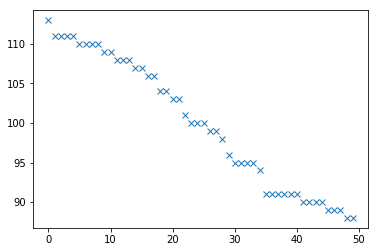

In [103]:
plt.plot(vals_3[250:300],linestyle='None',marker = "x")
plt.show()

In [82]:
c_to_n = {}

for i, c in enumerate(clusters_2):
    c_to_n[c] = i

### Pairs

In [154]:
pairs

['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACCTA ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'TGCCGTACAGACTGCCGGATATTATTTTTTTG CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
 'TATAGAGATCGTTTTTGGAATTTACAGCGAGG CCGTAAGTGGTTTGAGCGATGATATTTGTGC',
 'CAAGTGATATCCATCATCGCATCCAGTGCGCC AGTGCTGGACCATTTCAAATTCACAATAGAT',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCCA ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'CCCTCACACCGATTCGCCAAACGGTGGAGAAG AGCTGGGCGAAATTTTGATTCATCGTGATGA',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACCTA ATAGACCCCGAACAACAATACGCGCAAACCG',
 'GGAATGATATTTCAATAAATAATTATAACAAT CCCTCACACCGATTCGCCAAACGGTGGAGAA',
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACGC ATATATCAGAGCAAAAAACAAAGCCACAGCC',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC ACACGCCCTTATCAAATAGCTGTGATTTACCT',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCCA CATAAAGAAACTATTTTGCGTTTCGTTCAGG',
 'CAAGTGATATCCATCATCGCATCCAGTGCGCC AGTGCTGGACCATTTCAAATTCACAATAGAT',
 'AGTGCTGGACCATTTCAAATTCACA

In [155]:
X = np.zeros((len(pairs), 2))

In [185]:
def closest(sp, c_to_n):
    min_d = 100
    ans = -1
    for k, v in c_to_n.items():
        if editdistance.eval(k, sp) < min_d:
            min_d = editdistance.eval(k, sp)
            ans = v
    return ans

In [186]:
bad = 0
for i, p in tqdm(enumerate(pairs[:])):
    p1, p2 = p.split(" ")
    #print(p1, p2)
    cl_1 = closest(p1[:31], c_to_n)
    cl_2 = closest(p2[:31], c_to_n)
    if cl_1 != -1:
        X[i][0] = cl_1
    else:
        bad += 1
    if cl_2 != -1:
        X[i][1] = cl_2
    else:
        bad += 1

109822it [00:18, 5789.78it/s]


In [187]:
bad

0

### Clusters

In [124]:
import networkx as nx

In [210]:
def to_graph(gr, clusters_num, edges_num):
    G=nx.Graph()
    G.add_nodes_from(np.arange(clusters_num))
    
    edges = []
    curr_weight = 1000
    #while curr_weight > 100:
    for i in range(edges_num):
        lin_max = np.argmax(gr)
        curr_weight = np.max(gr)
        
        x, y = lin_max // gr.shape[0], lin_max % gr.shape[0]
        gr[x, :] = 0
        #gr[:, x] = 0

        G.add_edge(x, y)
        edges.append([x, y])
    
    #arr_to_sp(sp_9)
    return edges, G

100%|██████████| 109822/109822 [00:00<00:00, 489359.08it/s]


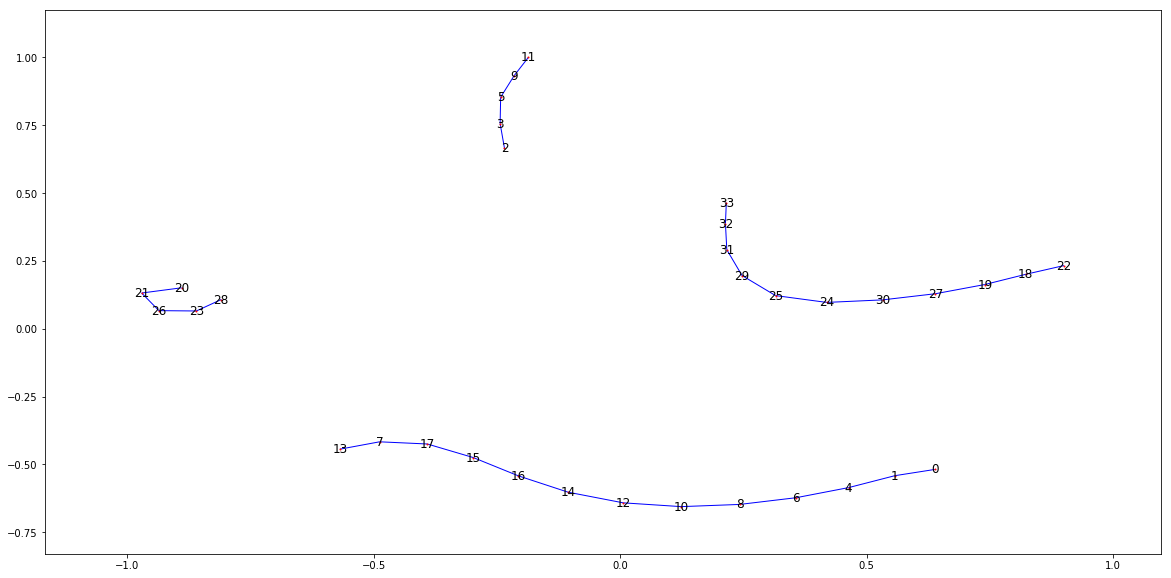

In [214]:
graph = np.zeros((34,34)).astype(int)

for p in tqdm(X.astype(int)):
    graph[p[0]][p[1]] += 1

pairs, G = to_graph(graph, 34, 30)

fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx(G, edge_color='b', node_size=1)
#nx.draw_networkx(G_ans, edge_color='r', node_size=1)
#nx.draw_networkx_edges(G, )
plt.show()

In [223]:
ans_3_31_clusters

[[22, 18, 19, 27, 30, 24, 25, 29, 31, 32, 33, 8],
 [0, 20, 21, 26, 23, 28],
 [0, 1, 4, 6, 8, 10, 12, 14, 16, 15, 17, 7, 13],
 [3, 5, 9, 11]]

In [196]:
ans_c = []
for sp in ans:
    ans_c.append(closest(sp, c_to_n))

In [219]:
ans_3 = ["CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC	TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG	GTAGTCCATCATTCCACCTATGTCTGAACTCC	CCGGGGGATAATGTTTACGGTCATGCGCCCCC	TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG	AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC	TAGTTTCCGTATCTCCGGATTTATAAAGCTGA	GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG	GCGACCGCTCAGAAATTCCAGACCCGATCCAAA	TCAACATTATCAATTACAACCGACAGGGAGCC	AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG	TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	CTGTTTTCGCAAATCTATGGACTATTGCTATT	GGGCGCACGGAATACAAAGCCGTGTATCTGCT	TGGCTCTGCAACAGCAGCACCCATGACCACGT	GAAATGCTGGTGAGCGTTAATGCCGCAAACAC	ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	ACACGCCCTTATCAAATAGCTGTGATTTACCTA	ATAGACCCCGAACAACAATACGCGCAAACCGA	TACCGTACAGACTGCCGGATATTATTTTTTTG	CTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG	AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC	TGCATGGCTTTGGCTTCCTCTTTGACGGACGC	ATATATCAGAGCAAAAAACAAAGCCACAGCCA	CATAAAGAAACTATTTTGCGTTTCGTTCAGGT	TTTTACAGTGTCAACAATCGTTCCCTGATTGT	CCGCCGTTGGCACCGTCAAACTCCGGTACTGT	TATAGAGATCGTTTTTGGAATTTACAGCGAGG	CCGTAAGTGGTTTGAGCGATGATATTTGTGCT",
"AGTGCTGGACCATTTCAAATTCACAATAGATT	GGAATGATATTTCAATAAATAATTATAACAAT	CCCTCACACCGATTCGCCAAACGGTGGAGAAG	AGCTGGGCGAAATTTTGATTCATCGTGATGAC"]

ans_3_31 = []
for seq in ans_3:
    ans_3_31.append([x[:31] for x in seq.split("\t")])

In [222]:
ans_3_31_clusters = []
for chain in ans_3_31:
    ans_3_31_clusters.append([closest(x, c_to_n) for x in chain])

In [202]:
print(ans_c)

[22, 18, 19, 27, 30, 24, 25, 29, 31, 32, 33, 8, 0, 20, 21, 26, 23, 28, 0, 1, 4, 6, 8, 10, 12, 14, 16, 15, 17, 7, 13, 3, 5, 9, 11]


In [145]:
ans = ['CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG',
 'GTAGTCCATCATTCCACCTATGTCTGAACTC',
 'CCGGGGGATAATGTTTACGGTCATGCGCCCC',
 'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA',
 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT',
 'TAGTTTCCGTATCTCCGGATTTATAAAGCTG',
 'GCAGGCGGCGACGCGCAGGGTATGCGCGATT',
 'GCGACCGCTCAGAAATTCCAGACCCGATCCA',
 'TCAACATTATCAATTACAACCGACAGGGAGC',
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT',
 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAA',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'CTGTTTTCGCAAATCTATGGACTATTGCTAT',
 'GGGCGCACGGAATACAAAGCCGTGTATCTGC',
 'TGGCTCTGCAACAGCAGCACCCATGACCACG',
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACA',
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACC',
 'ATAGACCCCGAACAACAATACGCGCAAACCG',
 'TACCGTACAGACTGCCGGATATTATTTTTTT',
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG',
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACG',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCC',
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGG',
 'TTTTACAGTGTCAACAATCGTTCCCTGATTG',
 'CCGCCGTTGGCACCGTCAAACTCCGGTACTG',
 'TATAGAGATCGTTTTTGGAATTTACAGCGAG',
 'CCGTAAGTGGTTTGAGCGATGATATTTGTGC',
 'AGTGCTGGACCATTTCAAATTCACAATAGAT',
 'GGAATGATATTTCAATAAATAATTATAACAA',
 'CCCTCACACCGATTCGCCAAACGGTGGAGAA',
 'AGCTGGGCGAAATTTTGATTCATCGTGATGA']

In [148]:
c = 0
for sp in clusters_2:
    if sp in ans:
        c+=1

In [149]:
c

33